In [1]:
#%matplotlib notebook

In [2]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
#Import Data
zillow_price = pd.read_csv("../PythonStuff/pricepersqft.csv")
zillow_price.head(10)
zillow_price.columns

Index(['City', 'State', '12-Apr', '12-May', '12-Jun', '12-Jul', '12-Aug',
       '12-Sep', '12-Oct', '12-Nov', '12-Dec', '13-Jan', '13-Feb', '13-Mar',
       '13-Apr', '13-May', '13-Jun', '13-Jul', '13-Aug', '13-Sep', '13-Oct',
       '13-Nov', '13-Dec', '14-Jan', '14-Feb', '14-Mar', '14-Apr', '14-May',
       '14-Jun', '14-Jul', '14-Aug', '14-Sep', '14-Oct', '14-Nov', '14-Dec',
       '15-Jan', '15-Feb', '15-Mar', '15-Apr', '15-May', '15-Jun', '15-Jul',
       '15-Aug', '15-Sep', '15-Oct', '15-Nov', '15-Dec', '16-Jan', '16-Feb',
       '16-Mar', '16-Apr', '16-May', '16-Jun', '16-Jul', '16-Aug', '16-Sep',
       '16-Oct', '16-Nov', '16-Dec', '17-Jan'],
      dtype='object')

In [4]:
#Define Cities
city_df = zillow_price[((zillow_price.City == 'Washington')|
             (zillow_price.City == 'San Diego')|
             (zillow_price.City == 'Washington')|
            (zillow_price.City == 'New York')|
            (zillow_price.City == 'Albuquerque')|
            (zillow_price.City == 'Atlanta')|
            (zillow_price.City == 'Nashville')) &
             ((zillow_price.State == 'NY')|
             (zillow_price.State == 'CA')|
             (zillow_price.State == 'DC')|
             (zillow_price.State == 'NM')|
             (zillow_price.State == 'TN')|
             (zillow_price.State == 'GA'))]
city_df = city_df.reset_index(drop = True)

In [5]:
zillow_cities = city_df.drop([6,7,8])
zillow_cities

,City,State,12-Apr,12-May,12-Jun,12-Jul,12-Aug,12-Sep,12-Oct,12-Nov,...,16-Apr,16-May,16-Jun,16-Jul,16-Aug,16-Sep,16-Oct,16-Nov,16-Dec,17-Jan
0,New York,NY,1.402,1.412,1.420,1.424,1.422,1.420,1.426,1.442,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,San Diego,CA,1.486,1.486,1.488,1.490,1.492,1.492,1.494,1.496,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,1.816
2,Washington,DC,2.014,2.014,2.008,1.994,1.978,1.970,1.970,1.980,...,2.200,2.212,2.222,2.224,2.220,2.220,2.226,2.234,2.236,2.238
3,Nashville,TN,0.770,0.774,0.776,0.778,0.778,0.778,0.778,0.782,...,1.004,1.010,1.014,1.018,1.020,1.022,1.024,1.028,1.030,1.034
4,Albuquerque,NM,0.706,0.702,0.700,0.694,0.690,0.688,0.688,0.690,...,0.738,0.738,0.738,0.738,0.738,0.738,0.740,0.740,0.740,0.738
5,Atlanta,GA,0.932,0.930,0.932,0.938,0.940,0.942,0.942,0.942,...,1.176,1.186,1.194,1.204,1.212,1.222,1.230,1.240,1.244,1.246


In [6]:
#Set New Index
columns = zillow_cities.columns.to_list()
new_columns = []
for i in columns:
    new = i[len(i)-6:len(i)-4]
    new_columns.append(new)
new_columns[0] = 'City'
new_columns[1] = 'State'
zillow_cities.columns = new_columns

column_list = ['12', '13', '14', '15', '16', '17']
for i in column_list:
    try:
        zillow_cities[str('20')+str(i)] =  zillow_cities[i].mean(axis = 1).reset_index(drop = True)
    except:
        pass

new_cities = zillow_cities[['City', 'State', '2013', '2014', '2015', '2016']]

In [7]:
zillow_cities.columns


Index(['City', 'State', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13',
       '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14',
       '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15',
       '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16',
       '17', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [8]:
new_cities.set_index(["City"])


,State,2013,2014,2015,2016
City,,,,,
New York,NY,1.514667,1.631000,1.741333,1.823833
San Diego,CA,1.525667,1.581000,1.689667,1.781833
Washington,DC,2.036333,2.037833,2.137833,2.215000
Nashville,TN,0.802667,0.854167,0.939833,1.011333
Albuquerque,NM,0.694167,0.699000,0.724333,0.737667
Atlanta,GA,0.970500,1.012500,1.110333,1.200500


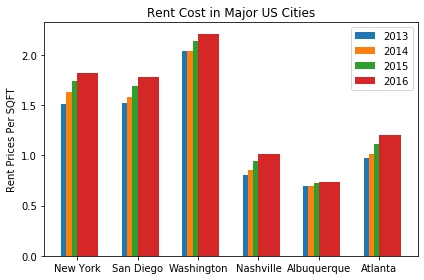

In [9]:
labels = new_cities["City"]

Rent_2013 = new_cities["2013"]
Rent_2014 = new_cities["2014"]
Rent_2015 = new_cities["2015"]
Rent_2016 = new_cities["2016"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects2 = ax.bar(x - width/4, Rent_2013, width, label='2013')
rects2 = ax.bar(x, Rent_2014, width, label='2014')
rects2 = ax.bar(x + width/4, Rent_2015, width, label='2015')
rects2 = ax.bar(x + width/2, Rent_2016, width, label='2016')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rent Prices Per SQFT')
ax.set_title('Rent Cost in Major US Cities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

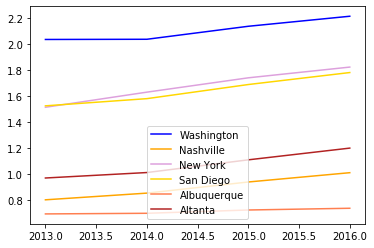

In [10]:

years = [2013, 2014, 2015, 2016]


washington_data = new_cities.iloc[2][2:6].to_list()
nashville_data = new_cities.iloc[3][2:6].to_list()
newyork_data = new_cities.iloc[0][2:6].to_list()
sandiego_data = new_cities.iloc[1][2:6].to_list()
albuquerque_data = new_cities.iloc[4][2:6].to_list()
atlanta_data = new_cities.iloc[5][2:6].to_list()

washington, = plt.plot(years, washington_data, color="blue", label="Washington")
nashville, = plt.plot(years, nashville_data, color="orange", label="Nashville")
new_york, = plt.plot(years, newyork_data, color="plum", label="New York")
san_diego, = plt.plot(years, sandiego_data, color="gold", label="San Diego")
albuquerque, = plt.plot(years, albuquerque_data, color="coral", label="Albuquerque")
altanta, = plt.plot(years, atlanta_data, color="firebrick", label="Altanta")




nashville_data

plt.legend()

plt.show()
